<a href="https://colab.research.google.com/github/sid0312/UCI_notebooks/blob/main/UCI_energy_conservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.0


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [8]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'


df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

norm_train_X = norm(train)
norm_test_X = norm(test)

In [28]:
input = Input(shape=(len(train.columns),))
dense_1 = Dense(units='128',activation='relu')(input)
dense_2 = Dense(units='128',activation='relu')(dense_1)
y1_op = Dense(units='1',activation='relu',name='y1_op')(dense_2)
dense_3 = Dense(units='64',activation='relu')(dense_2)
y2_op = Dense(units='1',activation='relu',name='y2_op')(dense_3)

model = Model(inputs=input,outputs = [y1_op,y2_op])
print(model.summary())

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 128)          1152        input_6[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 128)          16512       dense_19[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 64)           8256        dense_20[0][0]                   
_______________________________________________________________________________________

In [29]:
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_op': 'mse', 'y2_op': 'mse'},
              metrics={'y1_op': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_op': tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

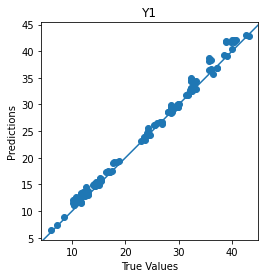

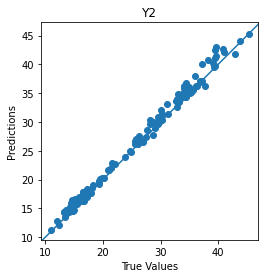

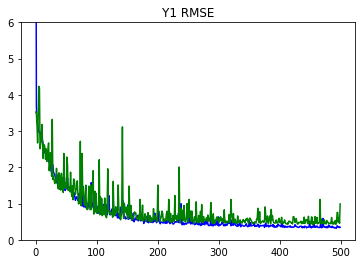

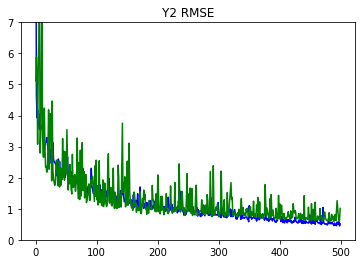

In [32]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_op_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_op_root_mean_squared_error', title='Y2 RMSE', ylim=7)